In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
horses_data = pd.read_csv("horseasses-population-in-nepal-by-district.csv")
milk_data = pd.read_csv("milk-animals-and-milk-production-in-nepal-by-district.csv")
meat_data = pd.read_csv("net-meat-production-in-nepal-by-district.csv")
cotton_data = pd.read_csv("production-of-cotton-in-nepal-by-district.csv")
egg_data = pd.read_csv("production-of-egg-in-nepal-by-district.csv")
rabbit_data = pd.read_csv("rabbit-population-in-nepal-by-district.csv")
wool_data = pd.read_csv("wool-production-in-nepal-by-district.csv")
yak_chauri_data = pd.read_csv("yak-nak-chauri-population-in-nepal-by-district.csv")

In [2]:
# Check the column name of the dataframe and see if the correction is required
print("Horses Data Colums:", horses_data.columns)
print("Milk Data Colums:", milk_data.columns)
print("Meat Data Colums:", meat_data.columns)
print("Cotton Data Colums:", cotton_data.columns)
print("Egg Data Colums:", egg_data.columns)
print("Rabbit Data Colums:", rabbit_data.columns)
print("Wool Data Colums:", wool_data.columns)
print("Yak/Chauri Data Colums:", yak_chauri_data.columns)

Horses Data Colums: Index(['DISTRICT', 'Horses/Asses'], dtype='object')
Milk Data Colums: Index(['DISTRICT', 'MILKING  COWS NO.', 'MILKING  BUFFALOES NO.', 'COW MILK',
       'BUFF MILK', 'TOTAL MILK PRODUCED'],
      dtype='object')
Meat Data Colums: Index(['DISTRICT', 'BUFF', 'MUTTON', 'CHEVON', 'PORK ', 'CHICKEN', 'DUCK MEAT',
       'TOTAL MEAT'],
      dtype='object')
Cotton Data Colums: Index(['DISTRICT', 'AREA (Ha.)', 'PROD. (Mt.)', 'YIELD Kg/Ha'], dtype='object')
Egg Data Colums: Index(['DISTRICT', 'LAYING HEN', 'LAYING DUCK', 'HEN EGG', 'DUCK EGG',
       'TOTAL EGG'],
      dtype='object')
Rabbit Data Colums: Index(['DISTRICT', 'Rabbit'], dtype='object')
Wool Data Colums: Index(['DISTRICT', 'SHEEPS NO.', 'SHEEP WOOL PRODUCED'], dtype='object')
Yak/Chauri Data Colums: Index(['DISTRICT', 'YAK/NAK/CHAURI'], dtype='object')


In [3]:
# Fixing Columns name in dataframe
horses_data = horses_data.rename(columns={"Horses/Asses": "HORSES/ASSES"})
horses_data.columns
milk_data = milk_data.rename(columns={"MILKING  COWS NO.": "MILKING COWS NO.", "MILKING  BUFFALOES NO.": "MILKING BUFFALOES NO."})
milk_data.columns
meat_data = meat_data.rename(columns={"BUFF": "BUFFALO MEAT", "MUTTON": "MUTTON MEAT", "CHEVON": "CHEVON MEAT", "PORK ": "PORK MEAT",
                                     "CHICKEN": "CHICKEN MEAT"})
meat_data.columns
cotton_data = cotton_data.rename(columns={"AREA (Ha.)": "AREA", "PROD. (Mt.)": "PRODUCED", "YIELD Kg/Ha": "YIELD"})
cotton_data.columns
rabbit_data = rabbit_data.rename(columns={"Rabbit": "RABBIT"})
rabbit_data.columns
wool_data = wool_data.rename(columns={"SHEEPS NO.": "SHEEP NUMBERS"})
wool_data.columns

Index(['DISTRICT', 'SHEEP NUMBERS', 'SHEEP WOOL PRODUCED'], dtype='object')

In [4]:
# Change the district name to uppercase
horses_data["DISTRICT"] = [district.upper() for district in horses_data["DISTRICT"]]
milk_data["DISTRICT"] = [district.upper() for district in milk_data["DISTRICT"]]
meat_data["DISTRICT"] = [district.upper() for district in meat_data["DISTRICT"]]
cotton_data["DISTRICT"] = [district.upper() for district in cotton_data["DISTRICT"]]
rabbit_data["DISTRICT"] = [district.upper() for district in rabbit_data["DISTRICT"]]
egg_data["DISTRICT"] = [district.upper() for district in egg_data["DISTRICT"]]
wool_data["DISTRICT"] = [district.upper() for district in wool_data["DISTRICT"]]
yak_chauri_data["DISTRICT"] = [district.upper() for district in yak_chauri_data["DISTRICT"]]

In [5]:
# Remove the region name from the district column to remove the inconsistency among the data
def clean_district(value):
    if (value.startswith('C.') or value.startswith('E.') 
        or value.startswith('FW.') or value.startswith('MW.') 
        or value.startswith('W.') or value.startswith('TOTAL') 
        or value.startswith('NEPAL')):
        return True
    else:
        return False

    
horses_region_data = horses_data[pd.Series([clean_district(district) for district in horses_data["DISTRICT"]])]
horses_district_data = horses_data.drop(horses_region_data.index)

milk_region_data = milk_data[pd.Series([clean_district(district) for district in milk_data["DISTRICT"]])]
milk_district_data = milk_data.drop(milk_region_data.index)

meat_region_data = meat_data[pd.Series([clean_district(district) for district in meat_data["DISTRICT"]])]
meat_district_data = meat_data.drop(meat_region_data.index)

cotton_region_data = cotton_data[pd.Series([clean_district(district) for district in cotton_data["DISTRICT"]])]
cotton_district_data = cotton_data.drop(cotton_region_data.index)

rabbit_region_data = rabbit_data[pd.Series([clean_district(district) for district in rabbit_data["DISTRICT"]])]
rabbit_district_data = rabbit_data.drop(rabbit_region_data.index)

egg_region_data = egg_data[pd.Series([clean_district(district) for district in egg_data["DISTRICT"]])]
egg_district_data = egg_data.drop(egg_region_data.index)

wool_region_data = wool_data[pd.Series([clean_district(district) for district in wool_data["DISTRICT"]])]
wool_district_data = wool_data.drop(wool_region_data.index)

yak_chauri_region_data = yak_chauri_data[pd.Series([clean_district(district) for district in yak_chauri_data["DISTRICT"]])]
yak_chauri_district_data = yak_chauri_data.drop(yak_chauri_region_data.index)

In [6]:
# Clean the rows for the same district with different spelling
horses_district_data["DISTRICT"].replace({"SANKHUWASABHA": "SANKHUWASHAVA", "TERATHUM": "TERHATHUM", "RAMECHAP": "RAMECHHAP"}, inplace=True)
milk_district_data["DISTRICT"].replace({"SANKHUWASABHA": "SANKHUWASHAVA", "TERATHUM": "TERHATHUM", "RAMECHAP": "RAMECHHAP"}, inplace=True)
meat_district_data["DISTRICT"].replace({"SANKHUWASABHA": "SANKHUWASHAVA", "TERATHUM": "TERHATHUM", "RAMECHAP": "RAMECHHAP"}, inplace=True)
cotton_district_data["DISTRICT"].replace({"SANKHUWASABHA": "SANKHUWASHAVA", "TERATHUM": "TERHATHUM", "RAMECHAP": "RAMECHHAP"}, inplace=True)
rabbit_district_data["DISTRICT"].replace({"SANKHUWASABHA": "SANKHUWASHAVA", "TERATHUM": "TERHATHUM", "RAMECHAP": "RAMECHHAP"}, inplace=True)
egg_district_data["DISTRICT"].replace({"SANKHUWASABHA": "SANKHUWASHAVA", "TERATHUM": "TERHATHUM", "RAMECHAP": "RAMECHHAP"}, inplace=True)
wool_district_data["DISTRICT"].replace({"SANKHUWASABHA": "SANKHUWASHAVA", "TERATHUM": "TERHATHUM", "RAMECHAP": "RAMECHHAP"}, inplace=True)
yak_chauri_district_data["DISTRICT"].replace({"SANKHUWASABHA": "SANKHUWASHAVA", "TERATHUM": "TERHATHUM", "RAMECHAP": "RAMECHHAP"}, inplace=True)

In [7]:
# Clean Region Data
horses_region_data["DISTRICT"].replace({"E.REGION": "E. REGION", "C.REGION": "C. REGION", 
                                        "W.REGION": "W. REGION", "MW.REGION": "MW. REGION", "FW.REGION": "FW. REGION"}, inplace=True)
milk_region_data["DISTRICT"].replace({"E.REGION": "E. REGION", "C.REGION": "C. REGION", 
                                      "W.REGION": "W. REGION", "MW.REGION": "MW. REGION", "FW.REGION": "FW. REGION"}, inplace=True)
meat_region_data["DISTRICT"].replace({"E.REGION": "E. REGION", "C.REGION": "C. REGION", 
                                      "W.REGION": "W. REGION", "MW.REGION": "MW. REGION", "FW.REGION": "FW. REGION"}, inplace=True)
cotton_region_data["DISTRICT"].replace({"E.REGION": "E. REGION", "C.REGION": "C. REGION", 
                                        "W.REGION": "W. REGION", "MW.REGION": "MW. REGION", "FW.REGION": "FW. REGION"}, inplace=True)
rabbit_region_data["DISTRICT"].replace({"E.REGION": "E. REGION", "C.REGION": "C. REGION", 
                                        "W.REGION": "W. REGION", "MW.REGION": "MW. REGION", "FW.REGION": "FW. REGION"}, inplace=True)
egg_region_data["DISTRICT"].replace({"E.REGION": "E. REGION", "C.REGION": "C. REGION", 
                                     "W.REGION": "W. REGION", "MW.REGION": "MW. REGION", "FW.REGION": "FW. REGION"}, inplace=True)
wool_region_data["DISTRICT"].replace({"E.REGION": "E. REGION", "C.REGION": "C. REGION", 
                                      "W.REGION": "W. REGION", "MW.REGION": "MW. REGION", "FW.REGION": "FW. REGION"}, inplace=True)
yak_chauri_region_data["DISTRICT"].replace({"E.REGION": "E. REGION", "C.REGION": "C. REGION", 
                                            "W.REGION": "W. REGION", "MW.REGION": "MW. REGION", "FW.REGION": "FW. REGION"}, inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [8]:
# Data merging
district_data = pd.merge(horses_district_data,milk_district_data, on="DISTRICT", how="outer").fillna(0)\
        .merge(meat_district_data, on="DISTRICT", how="outer").fillna(0)\
        .merge(cotton_district_data, on="DISTRICT", how="outer").fillna(0)\
        .merge(rabbit_district_data, on="DISTRICT", how="outer").fillna(0)\
        .merge(egg_district_data, on="DISTRICT", how="outer").fillna(0)\
        .merge(wool_district_data, on="DISTRICT", how="outer").fillna(0)\
        .merge(yak_chauri_district_data, on="DISTRICT", how="outer").fillna(0)
district_data.count()

DISTRICT                 75
HORSES/ASSES             75
MILKING COWS NO.         75
MILKING BUFFALOES NO.    75
COW MILK                 75
BUFF MILK                75
TOTAL MILK PRODUCED      75
BUFFALO MEAT             75
MUTTON MEAT              75
CHEVON MEAT              75
PORK MEAT                75
CHICKEN MEAT             75
DUCK MEAT                75
TOTAL MEAT               75
AREA                     75
PRODUCED                 75
YIELD                    75
RABBIT                   75
LAYING HEN               75
LAYING DUCK              75
HEN EGG                  75
DUCK EGG                 75
TOTAL EGG                75
SHEEP NUMBERS            75
SHEEP WOOL PRODUCED      75
YAK/NAK/CHAURI           75
dtype: int64

In [9]:
# Data Merging for development region data extraction
region_data = pd.merge(horses_region_data, milk_region_data, on="DISTRICT", how="outer").fillna(0)\
                .merge(meat_region_data, on="DISTRICT", how="outer").fillna(0)\
                .merge(cotton_region_data, on="DISTRICT", how="outer").fillna(0)\
                .merge(rabbit_region_data, on="DISTRICT", how="outer").fillna(0)\
                .merge(egg_region_data, on="DISTRICT", how="outer").fillna(0)\
                .merge(wool_region_data, on="DISTRICT", how="outer").fillna(0)\
                .merge(yak_chauri_region_data, on="DISTRICT", how="outer").fillna(0)

developments_region = ["E. REGION", "C. REGION", "W. REGION", "MW. REGION", "FW. REGION"]

development_region_data = region_data[region_data["DISTRICT"].isin(developments_region)]
development_region_data.head()

,DISTRICT,HORSES/ASSES,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFFALO MEAT,MUTTON MEAT,CHEVON MEAT,...,YIELD,RABBIT,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,SHEEP NUMBERS,SHEEP WOOL PRODUCED,YAK/NAK/CHAURI
0,E. REGION,7616.0,332384.0,292178.0,196708.0,263199.0,459907.0,41220.0,269.0,15729.0,...,0.0,5124.0,1780554.06,60193.0,214241.0,4712.0,218953.0,79815.0,58002.0,22797.0
1,C. REGION,1468.0,263728.0,377741.0,177815.0,358483.0,536299.0,50244.0,256.0,16893.0,...,0.0,5304.0,7118554.32,49572.0,756783.0,3907.0,760690.0,77126.0,57295.0,12484.0
2,W. REGION,7789.0,154560.0,341323.0,105190.0,315616.0,420806.0,40476.0,561.0,12540.0,...,0.0,8915.0,1745955.36,54256.0,163058.0,3963.0,167021.0,144089.0,101731.0,14823.0
3,MW. REGION,35124.0,144868.0,211885.0,76157.0,160705.0,236862.0,24911.0,1263.0,13528.0,...,0.0,11483.0,1170714.06,10534.0,119341.0,820.0,120161.0,397057.0,295006.0,17835.0
4,FW. REGION,3811.0,130595.0,132257.0,87936.0,112438.0,200374.0,18154.0,335.0,6893.0,...,0.0,1387.0,537737.00,6372.0,40743.0,504.0,41247.0,102571.0,76314.0,892.0


In [10]:
# Plotting the piechart for the various kind of meat production by district
district_data.columns

Index(['DISTRICT', 'HORSES/ASSES', 'MILKING COWS NO.', 'MILKING BUFFALOES NO.',
       'COW MILK', 'BUFF MILK', 'TOTAL MILK PRODUCED', 'BUFFALO MEAT',
       'MUTTON MEAT', 'CHEVON MEAT', 'PORK MEAT', 'CHICKEN MEAT', 'DUCK MEAT',
       'TOTAL MEAT', 'AREA', 'PRODUCED', 'YIELD', 'RABBIT', 'LAYING HEN',
       'LAYING DUCK', 'HEN EGG', 'DUCK EGG', 'TOTAL EGG', 'SHEEP NUMBERS',
       'SHEEP WOOL PRODUCED', 'YAK/NAK/CHAURI'],
      dtype='object')

In [11]:
# BiVarate Analysis of the meat production by district name
meat_data = district_data.groupby(by = district_data.DISTRICT)["TOTAL MEAT", 
                    "DISTRICT"].sum().sort_values(by = 'TOTAL MEAT', ascending = False).head(10)
meat_data

/tmp/ipykernel_353/2691106012.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  meat_data = district_data.groupby(by = district_data.DISTRICT)["TOTAL MEAT",


,TOTAL MEAT
DISTRICT,
CHITWAN,17753
MORANG,9359
KAILALI,9289
DANG,9261
JHAPA,9237
RUPANDEHI,8699
SUNSARI,8236
KASKI,7955
KAVRE,7775


<AxesSubplot:xlabel='DISTRICT'>

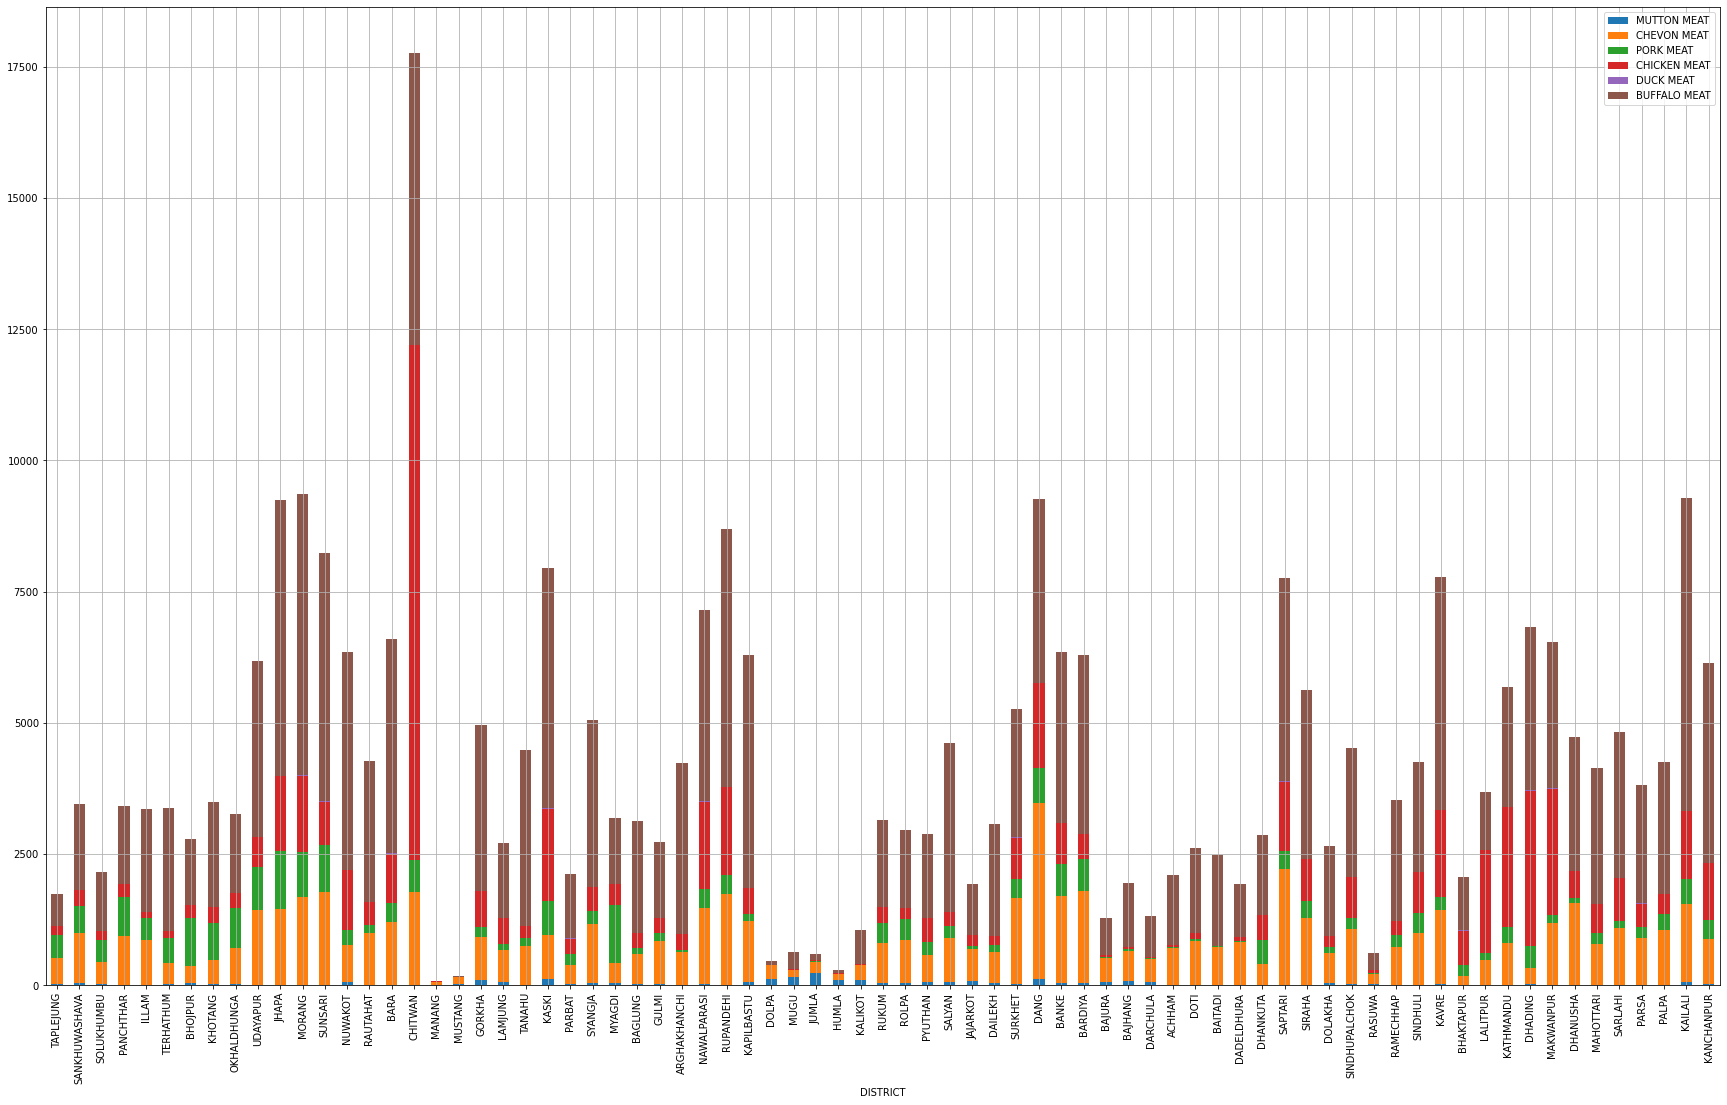

In [12]:
# Stacked bar for amount of meat produced throughout the district of Nepal
meat_df = pd.DataFrame(district_data, columns=['DISTRICT', 'MUTTON MEAT', 'CHEVON MEAT', 'PORK MEAT', 'CHICKEN MEAT', 'DUCK MEAT', 'BUFFALO MEAT'])
meat_df.plot(x='DISTRICT', y=['MUTTON MEAT', 'CHEVON MEAT', 'PORK MEAT', 'CHICKEN MEAT', 'DUCK MEAT', 'BUFFALO MEAT'], 
             kind="bar", stacked=True, figsize=(30, 18), rot=90, grid=True)

<AxesSubplot:>

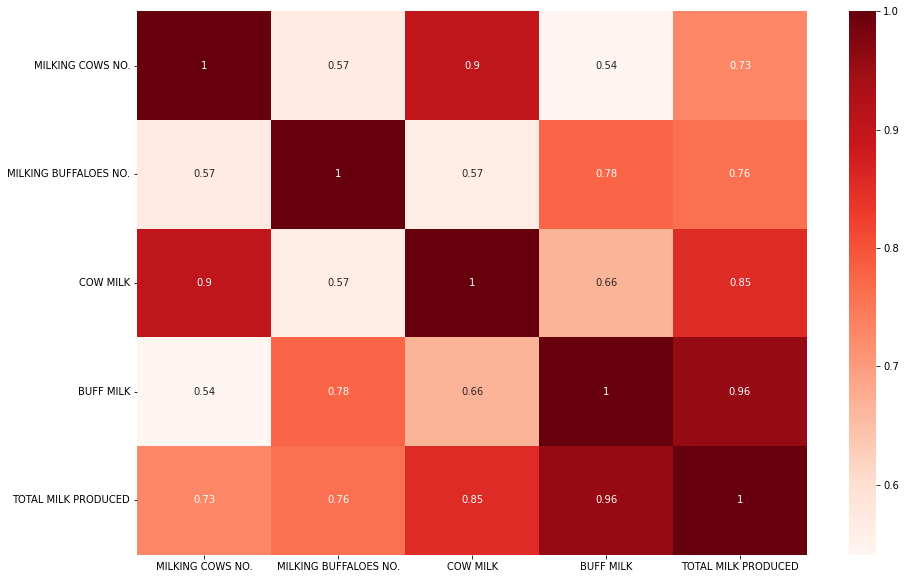

In [13]:
# Correlation between the column related to milk production
milk_prod_corr = district_data[['MILKING COWS NO.', 'MILKING BUFFALOES NO.','COW MILK', 'BUFF MILK', 'TOTAL MILK PRODUCED']].corr()
plt.figure(figsize=(15,10))
sns.heatmap(milk_prod_corr, annot=True, cmap="Reds")

<AxesSubplot:xlabel='TOTAL HENS AND DUCK', ylabel='TOTAL EGG'>

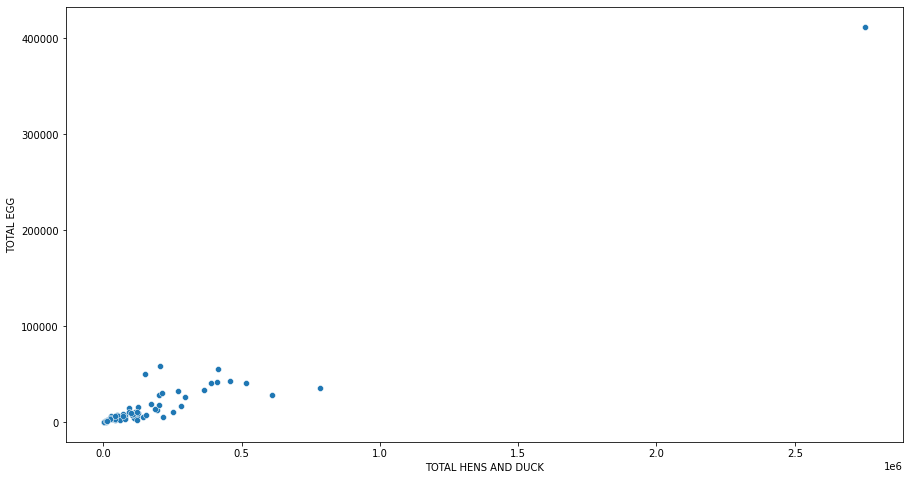

In [14]:
# Scatter Plot for total egges produced and Hens and Duck
district_data["TOTAL HENS AND DUCK"] = district_data['LAYING HEN'] + district_data['LAYING DUCK']
plt.figure(figsize=(15, 8))
sns.scatterplot(x="TOTAL HENS AND DUCK", y="TOTAL EGG", data=district_data)

<AxesSubplot:title={'center':'Bar Graph showing relation among number of sheep and wool produced'}, xlabel='DISTRICT'>

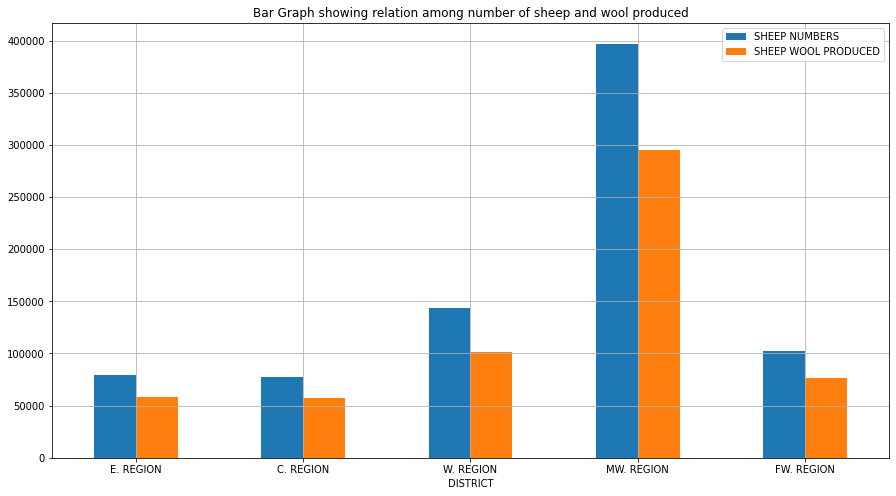

In [15]:
# Bar Graph for number of sheep reared and wool produced.
milk_df = pd.DataFrame(development_region_data, columns=['DISTRICT', 'SHEEP NUMBERS', 'SHEEP WOOL PRODUCED'])
milk_df.plot(x='DISTRICT', y=['SHEEP NUMBERS', 'SHEEP WOOL PRODUCED'], 
             kind="bar", stacked=False, figsize=(15, 8), rot=0, grid=True, 
             title="Bar Graph showing relation among number of sheep and wool produced")

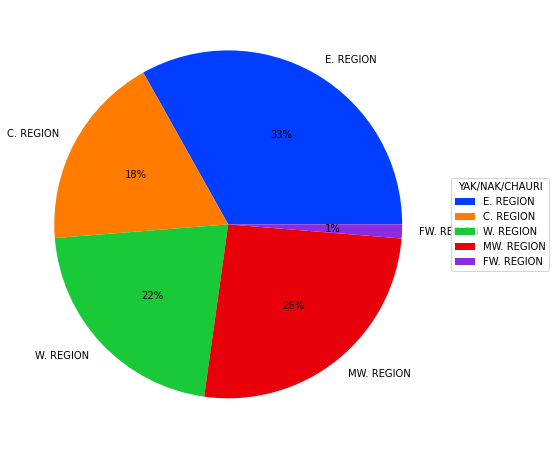

In [25]:
# Pie Chart for the total numbers of Yak/Nak/Chauri in development region
colors = sns.color_palette('bright')[0:5]
plt.figure(figsize=(15, 8))
labels = development_region_data["DISTRICT"].to_list()
data = development_region_data['YAK/NAK/CHAURI'].to_list()
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')
plt.legend(title="YAK/NAK/CHAURI",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()